<a href="https://colab.research.google.com/github/LeTrajano/Banana-quality-analysis/blob/main/0_2BananaQualityAnalysisAndMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUALIDADE DA BANANA**

Squad:
- Gabriela Souza
- Hugo Davi
- Filipe André
- Letícia Trajano
- Thayssa Alexandre
- Vinícius Sousa  


# **Limpeza, processamento e análise dos dados**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [64]:
dados_banana = pd.read_csv('/content/banana_quality.csv',sep=',')

util = {}
util['equivalentes'] = {
    "Size": "Tamanho",
    "Weight": "Peso",
    "Sweetness" : "Doçura",
    "HarvestTime" : "Tempo de colheita",
    "Softness" : "Suavidade",
    "Ripeness" : "Maturação",
    "Acidity" : "Acidez",
    "Quality" : "Qualidade"
}
dados_banana = dados_banana.fillna(0)
dados_banana = dados_banana.rename(columns=util['equivalentes'])

In [65]:
dados_banana.head(3)

,Tamanho,Peso,Doçura,Suavidade,Tempo de colheita,Maturação,Acidez,Qualidade
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good


In [66]:
dados_banana['Qualidade'] = dados_banana['Qualidade'].apply(lambda x: 1 if x == 'Good' else 0)
dados_banana.head(3)

,Tamanho,Peso,Doçura,Suavidade,Tempo de colheita,Maturação,Acidez,Qualidade
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1


In [67]:
mediana_tamanho = dados_banana['Tamanho'].median()
dados_banana.loc[dados_banana['Tamanho'] < 0, 'Tamanho'] = mediana_tamanho

mediana_peso = dados_banana['Peso'].median()
dados_banana.loc[dados_banana['Peso'] < 0, 'Peso'] = mediana_peso

mediana_docura = dados_banana['Doçura'].median()
dados_banana.loc[dados_banana['Doçura'] < 0, 'Doçura'] = mediana_docura

mediana_suavidade = dados_banana['Suavidade'].median()
dados_banana.loc[dados_banana['Suavidade'] < 0, 'Suavidade'] = mediana_suavidade

mediana_tempo = dados_banana['Tempo de colheita'].median()
dados_banana.loc[dados_banana['Tempo de colheita'] < 0, 'Tempo de colheita'] = mediana_tempo

mediana_maturacao = dados_banana['Maturação'].median()
dados_banana.loc[dados_banana['Maturação'] < 0, 'Maturação'] = mediana_maturacao

mediana_acidez = dados_banana['Acidez'].median()
dados_banana.loc[dados_banana['Acidez'] < 0, 'Acidez'] = mediana_acidez

dados_banana.shape

(8000, 8)

In [68]:
dados_banana.isnull().sum()

Tamanho              0
Peso                 0
Doçura               0
Suavidade            0
Tempo de colheita    0
Maturação            0
Acidez               0
Qualidade            0
dtype: int64

In [69]:
dados_banana.dtypes

Tamanho              float64
Peso                 float64
Doçura               float64
Suavidade            float64
Tempo de colheita    float64
Maturação            float64
Acidez               float64
Qualidade              int64
dtype: object

In [70]:
dados_banana["Qualidade"].value_counts()

Qualidade
1    4006
0    3994
Name: count, dtype: int64

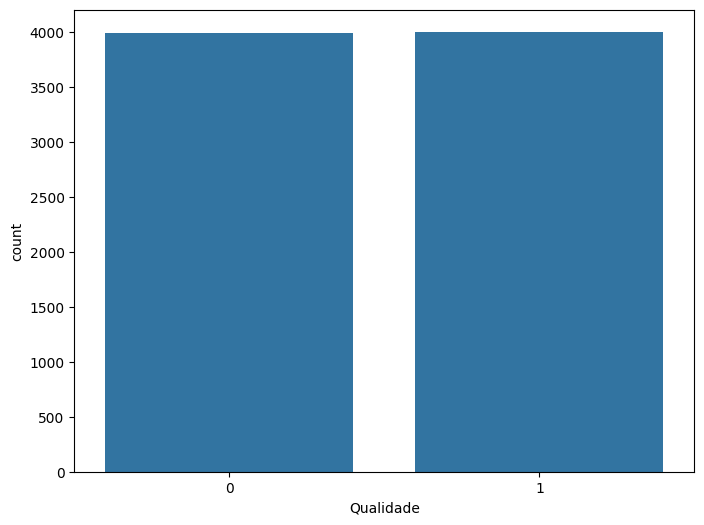

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x="Qualidade",data=dados_banana)
plt.show()

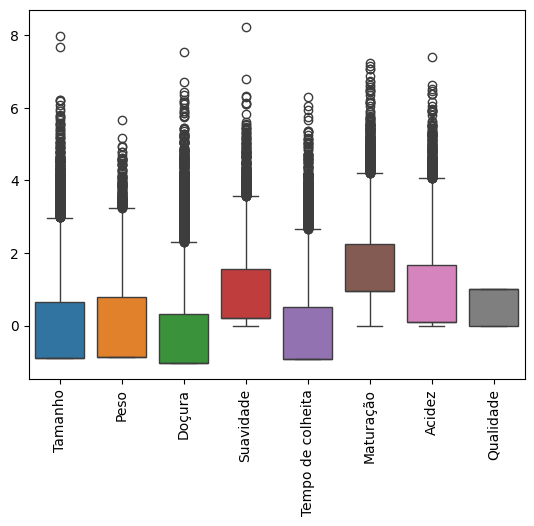

In [72]:
sns.boxplot(data=dados_banana)
plt.xticks(rotation=90)
plt.show()

Análise de Desempenho de Modelo

In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random

def preparar_para_treinamento(dados_banana: pd.DataFrame) -> tuple:
    X = dados_banana.drop(columns=['Qualidade'])
    y = dados_banana['Qualidade']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=random.uniform(0.10, 0.40))

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preparar_para_treinamento(dados_banana)
rdmfr = RandomForestClassifier()
rdmfr.fit(X_train, y_train)

pred = rdmfr.predict(X_test)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(accuracy, recall, precision, f1)

0.9373601789709173 0.9377289377289377 0.9343065693430657 0.9360146252285192


Visualização Matriz De Confusão

Random Forest :
Verdadeiros Positivos (1): 1024
Verdadeiros Negativos (0): 1071
Falsos Positivos: 72
Falsos Negativos: 68




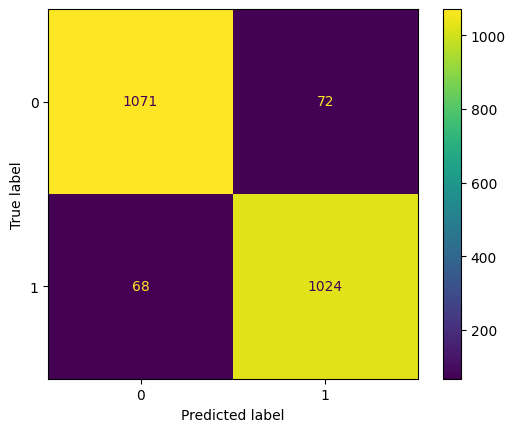

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf = confusion_matrix(y_test, pred)

display = ConfusionMatrixDisplay(confusion_matrix=conf)
display.plot()

true_negative, false_positive, false_negative, true_positive = conf.ravel()

print("Random Forest :")
print(f"Verdadeiros Positivos (1): {true_positive}")
print(f"Verdadeiros Negativos (0): {true_negative}")
print(f"Falsos Positivos: {false_positive}")
print(f"Falsos Negativos: {false_negative}")
print("\n")

### *Cálculos*

### Acurácia
$$Acurácia = \frac{TOTAL DE ACERTOS}{TOTAL DE ITENS}$$
Avalia o percentual de acertos

In [75]:
print(accuracy)
print((true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive))

0.9373601789709173
0.9373601789709173


### Sensibilidade
$$Sensibilidade = \frac{VP}{VP + FN}$$

Avalia a capacidade do modelo de detectar com sucesso resultados classificados como positivos.

In [76]:
print(recall)
print(true_positive / (true_positive + false_negative))

0.9377289377289377
0.9377289377289377


### Especificidade
$$Especificidade = \frac{VN}{VN + FP}$$
Avalia a capacidade do modelo de detectar resultados negativos

In [77]:
print(true_negative / (true_negative + false_positive))

0.937007874015748


### Precisão
$$Precisão = \frac{VP}{VP + FP}$$
Avalia a quantidade de verdadeiros positivos sobre a soma de todos os valores positivos

In [78]:
print(precision)
print(true_positive / (true_positive + false_positive))

0.9343065693430657
0.9343065693430657


### f1 Score
$$F_1 = \frac{2 \cdot \text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}}$$
Mostra uma relação entre precisão e recall

In [79]:
print(f1)
print(2 * ((true_positive / (true_positive + false_positive)) * (true_positive / (true_positive + false_negative))) / ((true_positive / (true_positive + false_positive)) + (true_positive / (true_positive + false_negative))))

0.9360146252285192
0.9360146252285192


# **Estudo da correlação do conjunto de dados**


Matriz de Correlação

## GRAFICOS DE CORRELAÇÃO DAS VARIÁVEIS

In [80]:
# Análise de correlação
correlation = dados_banana.corr()

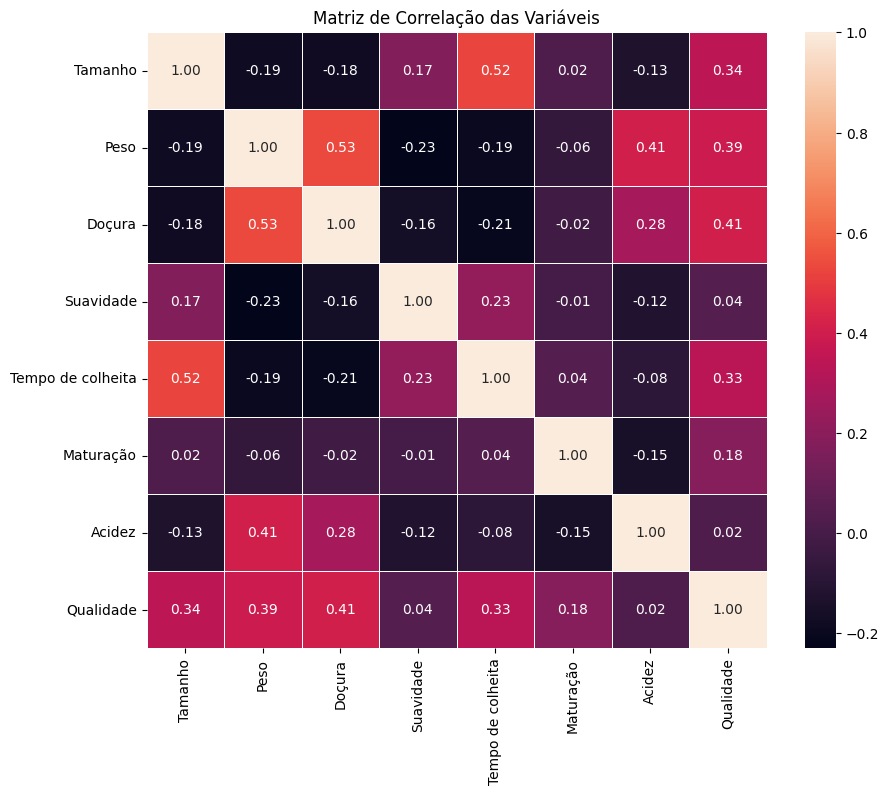

In [81]:
# Visualização da matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths=.6)
plt.title('Matriz de Correlação das Variáveis')
plt.show()


## Boxplots


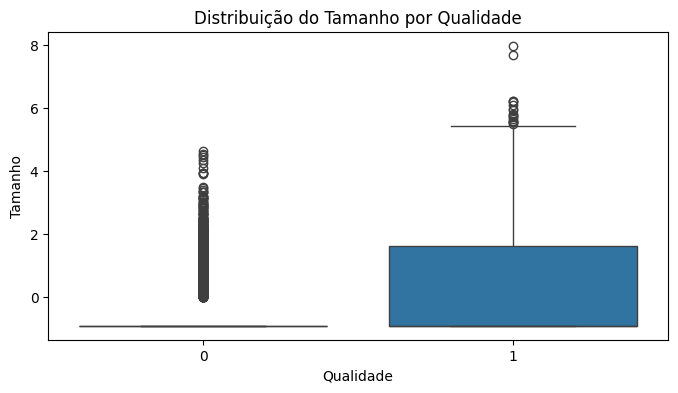

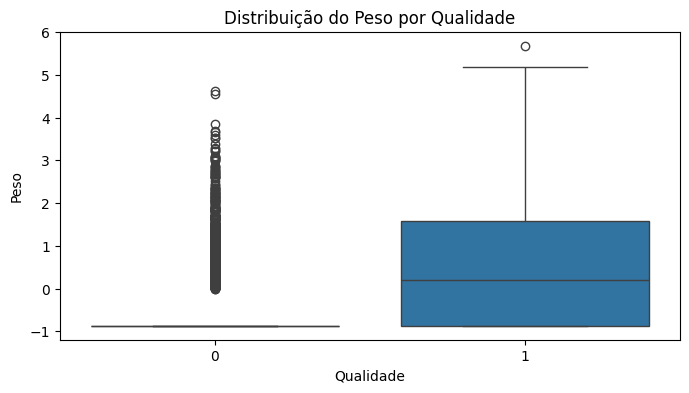

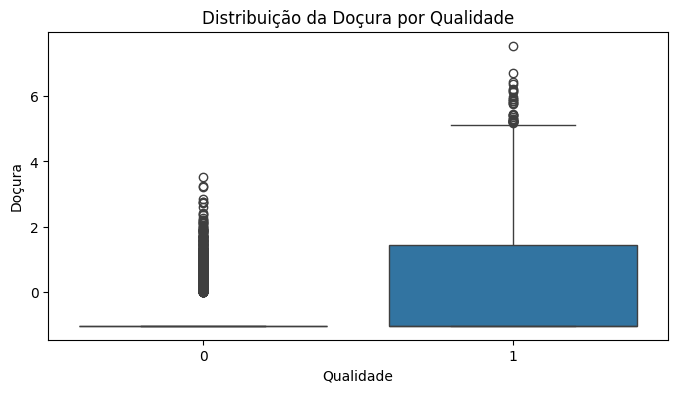

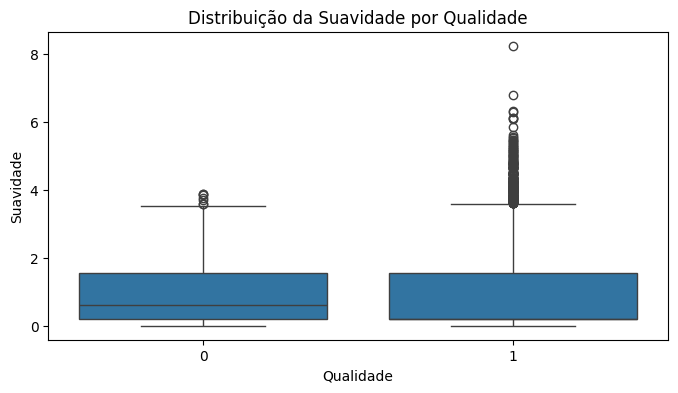

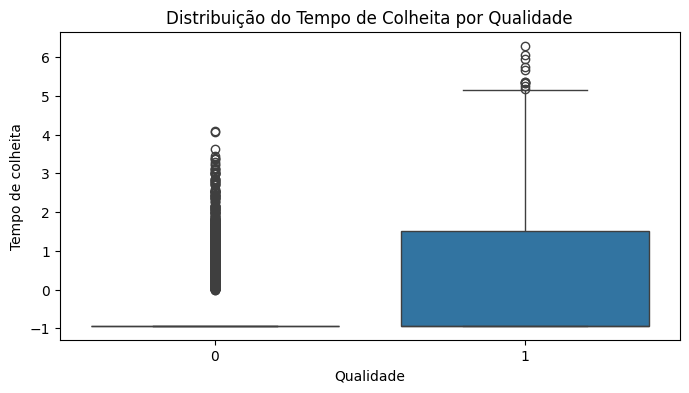

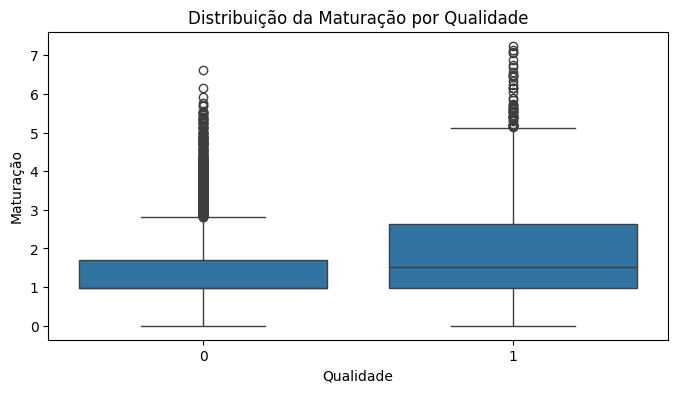

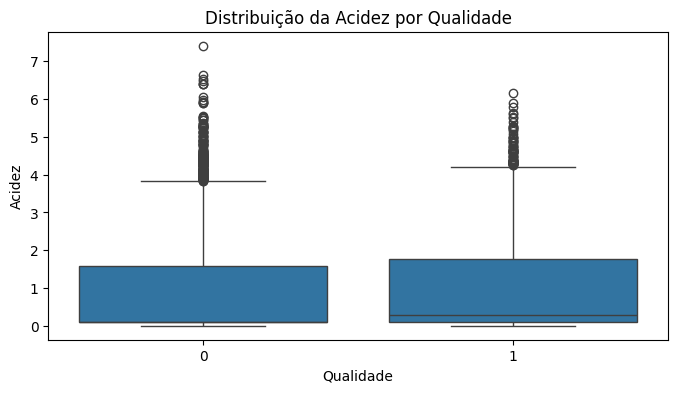

In [82]:
# Correção de valores negativos substituindo pela mediana
for col in ['Tamanho', 'Peso', 'Doçura', 'Suavidade', 'Tempo de colheita', 'Maturação', 'Acidez']:
    mediana = dados_banana[col].median()
    dados_banana.loc[dados_banana[col] < 0, col] = mediana

# Boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(x='Qualidade', y='Tamanho', data=dados_banana)
plt.title('Distribuição do Tamanho por Qualidade')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Qualidade', y='Peso', data=dados_banana)
plt.title('Distribuição do Peso por Qualidade')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Qualidade', y='Doçura', data=dados_banana)
plt.title('Distribuição da Doçura por Qualidade')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Qualidade', y='Suavidade', data=dados_banana)
plt.title('Distribuição da Suavidade por Qualidade')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Qualidade', y='Tempo de colheita', data=dados_banana)
plt.title('Distribuição do Tempo de Colheita por Qualidade')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Qualidade', y='Maturação', data=dados_banana)
plt.title('Distribuição da Maturação por Qualidade')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Qualidade', y='Acidez', data=dados_banana)
plt.title('Distribuição da Acidez por Qualidade')
plt.show()



## Histogramas/Density plots

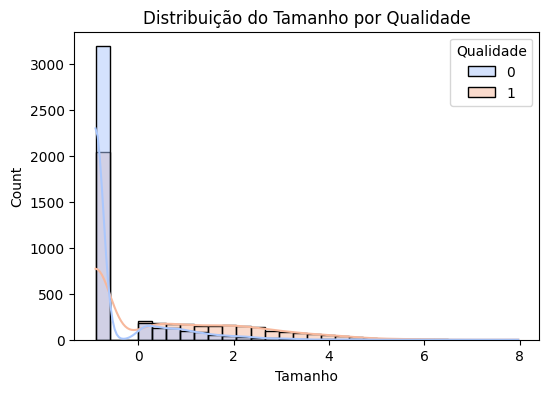

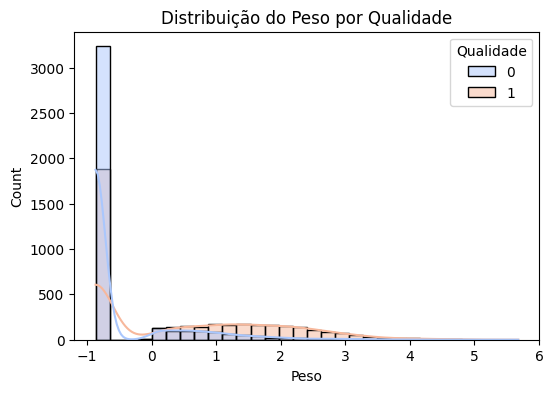

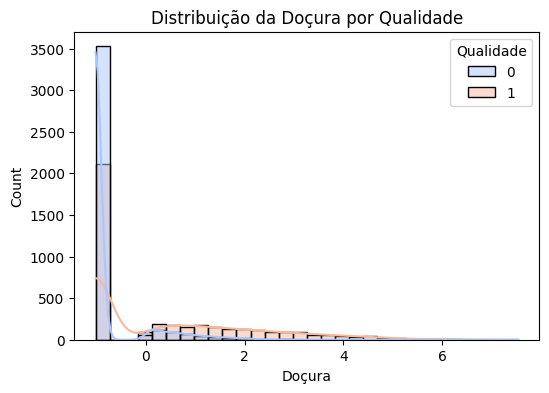

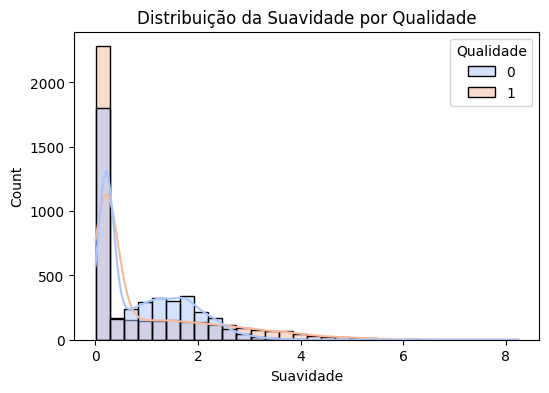

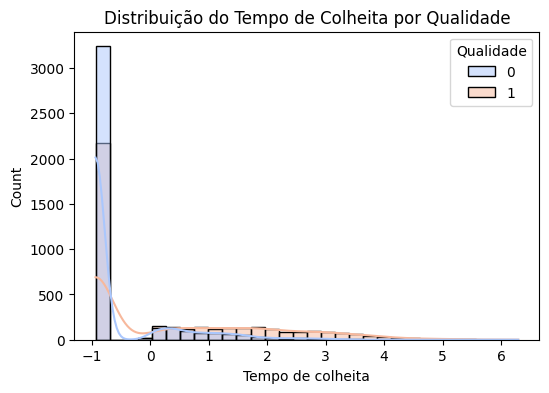

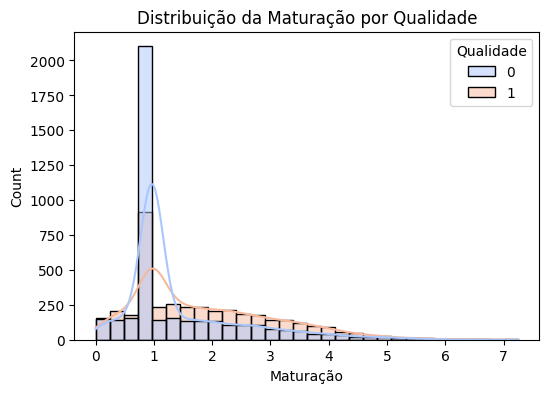

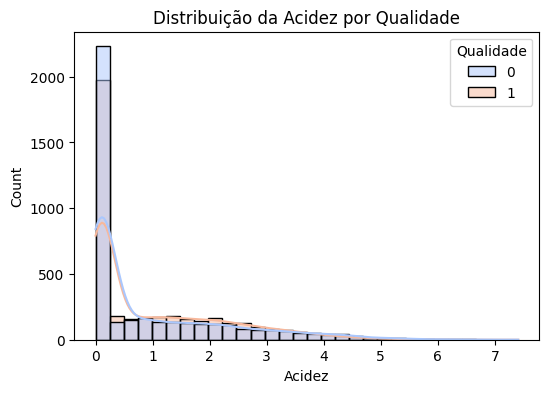

In [83]:
plt.figure(figsize=(6, 4))
sns.histplot(data=dados_banana, x='Tamanho', hue='Qualidade', kde=True, palette='coolwarm', bins=30)
plt.title('Distribuição do Tamanho por Qualidade')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=dados_banana, x='Peso', hue='Qualidade', kde=True, palette='coolwarm', bins=30)
plt.title('Distribuição do Peso por Qualidade')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=dados_banana, x='Doçura', hue='Qualidade', kde=True, palette='coolwarm', bins=30)
plt.title('Distribuição da Doçura por Qualidade')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=dados_banana, x='Suavidade', hue='Qualidade', kde=True, palette='coolwarm', bins=30)
plt.title('Distribuição da Suavidade por Qualidade')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=dados_banana, x='Tempo de colheita', hue='Qualidade', kde=True, palette='coolwarm', bins=30)
plt.title('Distribuição do Tempo de Colheita por Qualidade')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=dados_banana, x='Maturação', hue='Qualidade', kde=True, palette='coolwarm', bins=30)
plt.title('Distribuição da Maturação por Qualidade')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=dados_banana, x='Acidez', hue='Qualidade', kde=True, palette='coolwarm', bins=30)
plt.title('Distribuição da Acidez por Qualidade')
plt.show()



## Gráficos de barras

In [84]:
# Carregar os dados
dados_banana = pd.read_csv('/content/banana_quality.csv', sep=',')

# Renomear colunas
util = {
    "Size": "Tamanho",
    "Weight": "Peso",
    "Sweetness": "Doçura",
    "HarvestTime": "Tempo de colheita",
    "Softness": "Suavidade",
    "Ripeness": "Maturação",
    "Acidity": "Acidez",
    "Quality": "Qualidade"
}
dados_banana = dados_banana.rename(columns=util)
dados_banana = dados_banana.fillna(0)
dados_banana['Qualidade'] = dados_banana['Qualidade'].apply(lambda x: 1 if x == 'Good' else 0)

# Verificar a estrutura dos dados
print(dados_banana.head())

    Tamanho      Peso    Doçura  Suavidade  Tempo de colheita  Maturação  \
0 -1.924968  0.468078  3.077832  -1.472177           0.294799   2.435570   
1 -2.409751  0.486870  0.346921  -2.495099          -0.892213   2.067549   
2 -0.357607  1.483176  1.568452  -2.645145          -0.647267   3.090643   
3 -0.868524  1.566201  1.889605  -1.273761          -1.006278   1.873001   
4  0.651825  1.319199 -0.022459  -1.209709          -1.430692   1.078345   

     Acidez  Qualidade  
0  0.271290          1  
1  0.307325          1  
2  1.427322          1  
3  0.477862          1  
4  2.812442          1  


Gráfico de barras para qualidade por faixa de tamanho


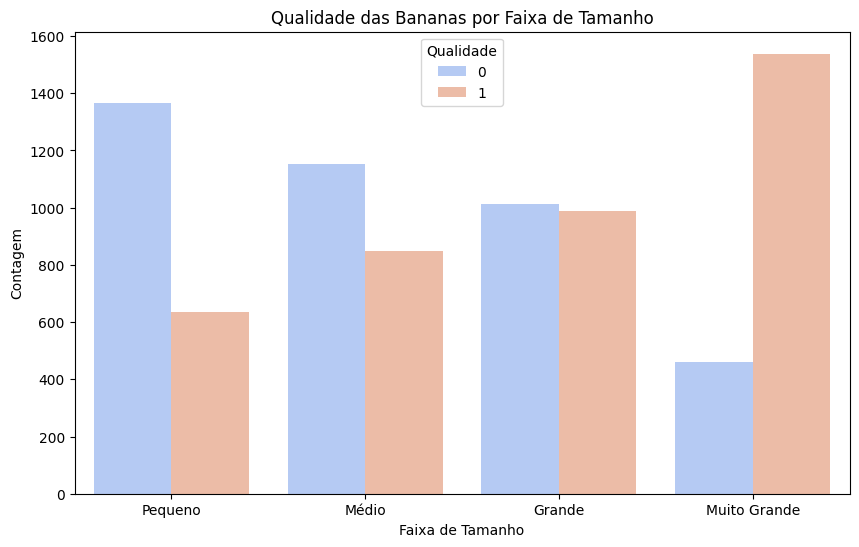

In [85]:
# Definir bins manualmente
tamanho_bins = [-float('inf'), dados_banana['Tamanho'].quantile(0.25), dados_banana['Tamanho'].quantile(0.5), dados_banana['Tamanho'].quantile(0.75), float('inf')]
tamanho_labels = ['Pequeno', 'Médio', 'Grande', 'Muito Grande']

# Criar bins personalizados
dados_banana['Faixa_Tamanho'] = pd.cut(dados_banana['Tamanho'], bins=tamanho_bins, labels=tamanho_labels)

# Gráfico de barras para qualidade por faixa de tamanho
plt.figure(figsize=(10, 6))
sns.countplot(x='Faixa_Tamanho', hue='Qualidade', data=dados_banana, palette='coolwarm')
plt.title('Qualidade das Bananas por Faixa de Tamanho')
plt.xlabel('Faixa de Tamanho')
plt.ylabel('Contagem')
plt.show()

Qualidade por Peso


Comparar a contagem de bananas de diferentes pesos com a variável de qualidade.

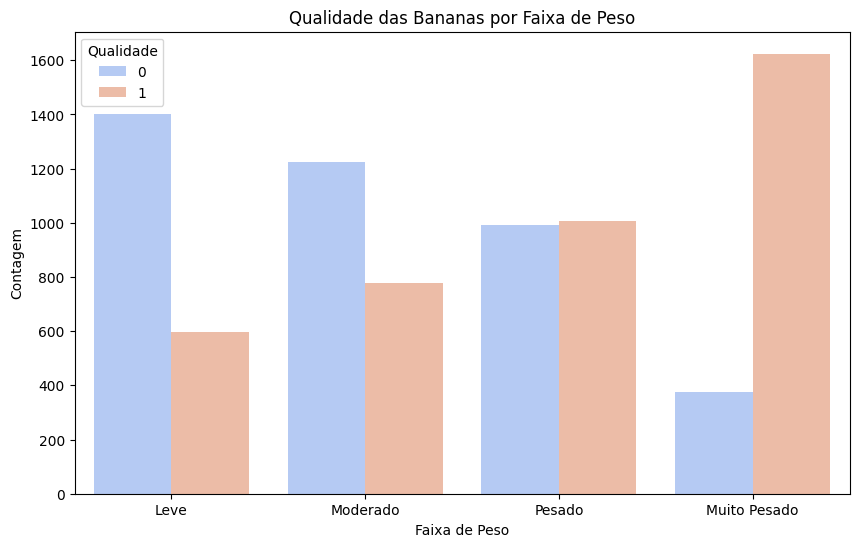

In [86]:
# Criação de faixas de peso
dados_banana['Faixa_Peso'] = pd.qcut(dados_banana['Peso'], q=4, labels=['Leve', 'Moderado', 'Pesado', 'Muito Pesado'])

# Gráfico de barras para qualidade por faixa de peso
plt.figure(figsize=(10, 6))
sns.countplot(x='Faixa_Peso', hue='Qualidade', data=dados_banana, palette='coolwarm')
plt.title('Qualidade das Bananas por Faixa de Peso')
plt.xlabel('Faixa de Peso')
plt.ylabel('Contagem')
plt.show()

Gráfico de qualidade por faixa de maturação

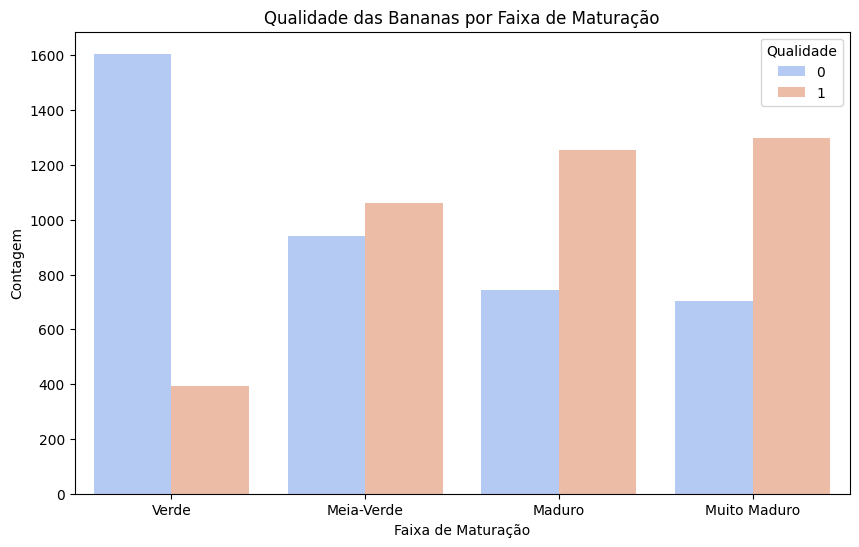

In [87]:
# Definir bins manualmente
maturacao_bins = [-float('inf'), dados_banana['Maturação'].quantile(0.25), dados_banana['Maturação'].quantile(0.5), dados_banana['Maturação'].quantile(0.75), float('inf')]
maturacao_labels = ['Verde', 'Meia-Verde', 'Maduro', 'Muito Maduro']

# Criar bins personalizados
dados_banana['Faixa_Maturacao'] = pd.cut(dados_banana['Maturação'], bins=maturacao_bins, labels=maturacao_labels)

# Gráfico de barras para qualidade por faixa de maturação
plt.figure(figsize=(10, 6))
sns.countplot(x='Faixa_Maturacao', hue='Qualidade', data=dados_banana, palette='coolwarm')
plt.title('Qualidade das Bananas por Faixa de Maturação')
plt.xlabel('Faixa de Maturação')
plt.ylabel('Contagem')
plt.show()


## Scatter plots

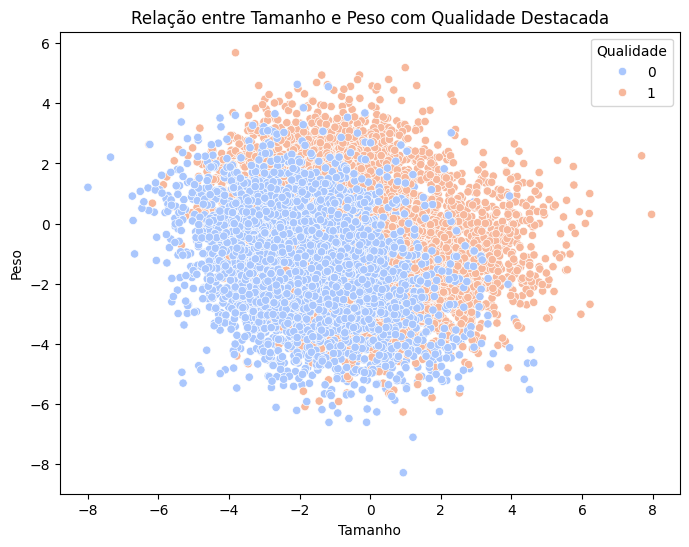

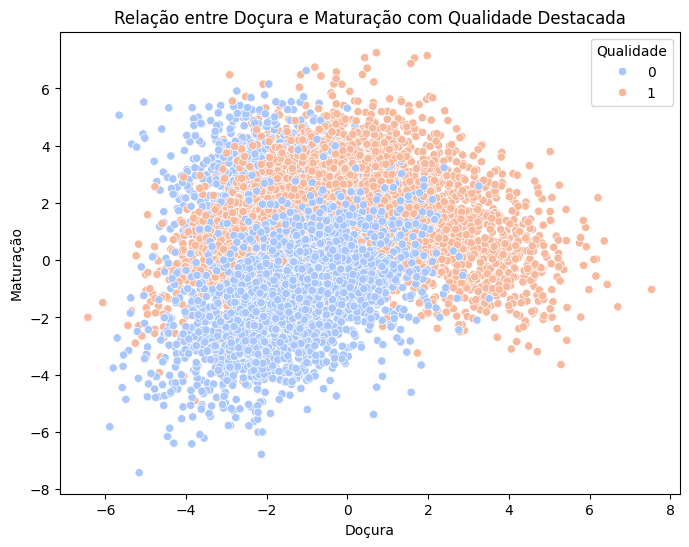

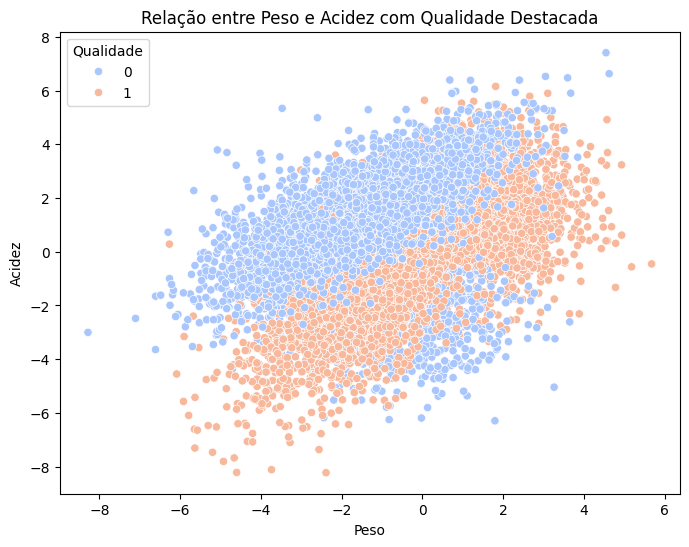

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tamanho', y='Peso', hue='Qualidade', data=dados_banana, palette='coolwarm')
plt.title('Relação entre Tamanho e Peso com Qualidade Destacada')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Doçura', y='Maturação', hue='Qualidade', data=dados_banana, palette='coolwarm')
plt.title('Relação entre Doçura e Maturação com Qualidade Destacada')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Peso', y='Acidez', hue='Qualidade', data=dados_banana, palette='coolwarm')
plt.title('Relação entre Peso e Acidez com Qualidade Destacada')
plt.show()


Relações individuais


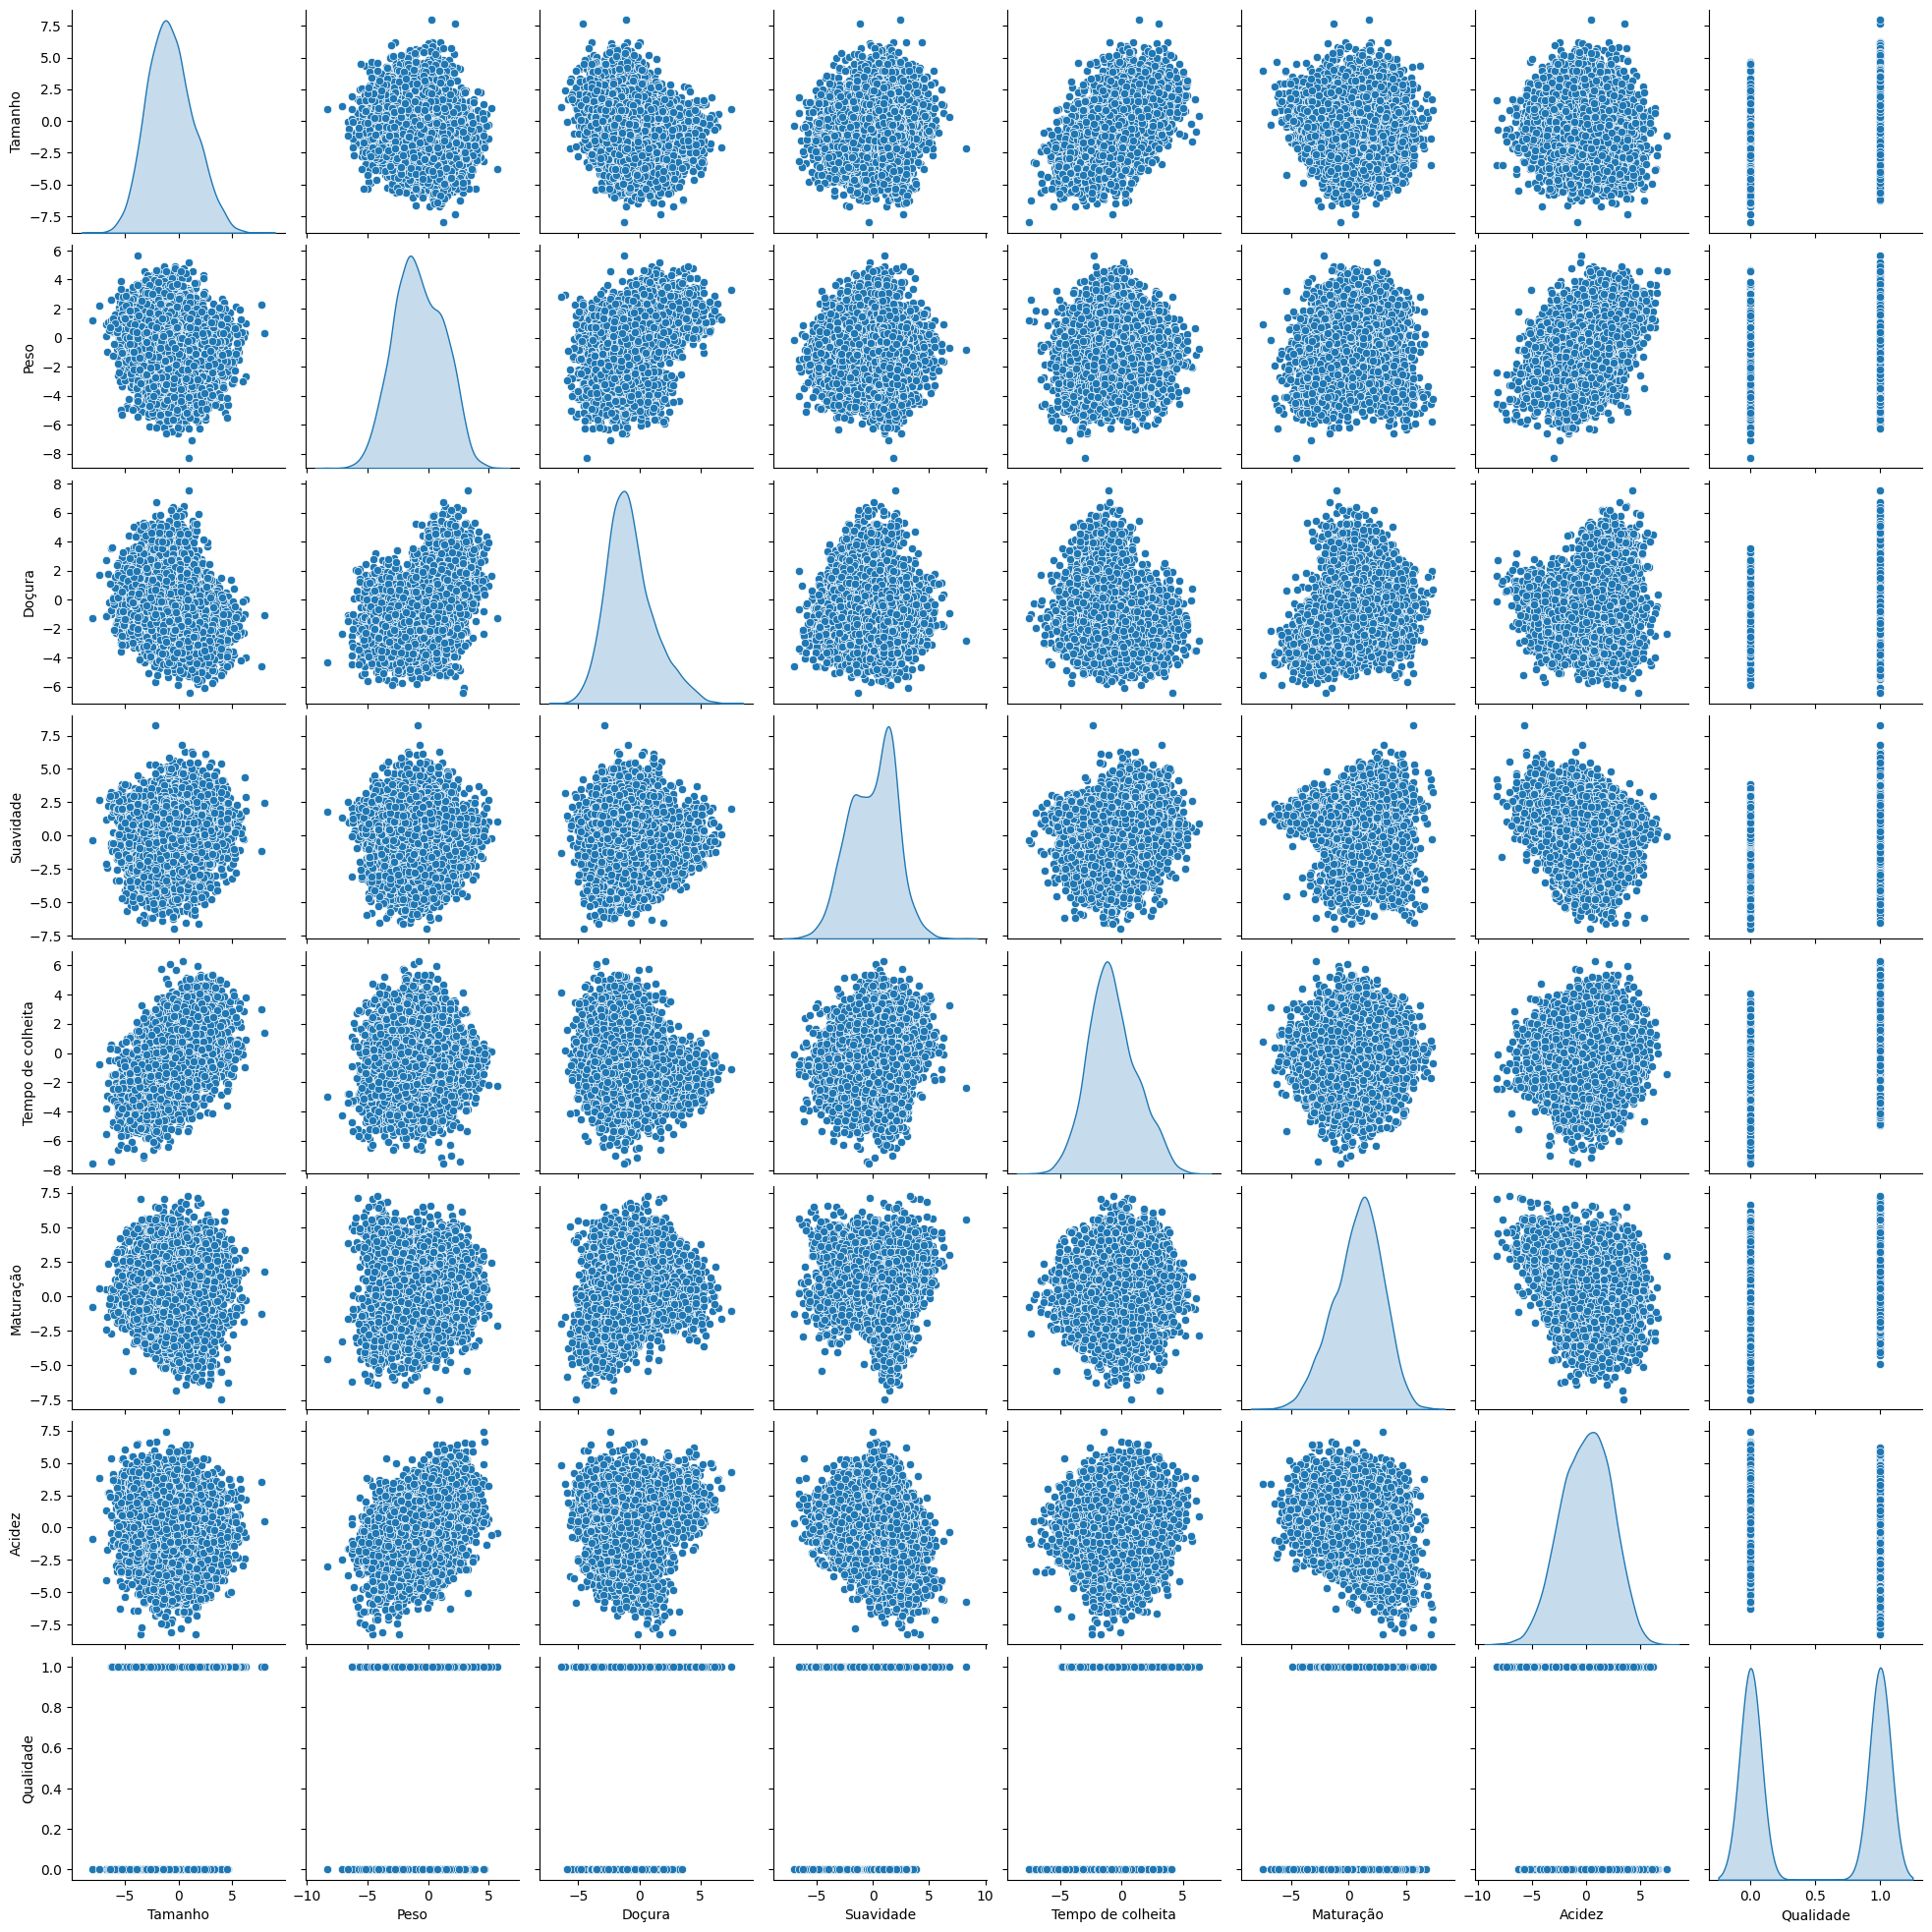

In [89]:
# Scatter plots para visualizar relações individuais
sns.pairplot(dados_banana, diag_kind='kde')
plt.show()

# **DASHBOARD**
     *Plotly


In [90]:
pip install dash dash-core-components dash-html-components plotly

## Dash

Preparando dados

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Função para carregar e preparar os dados
def preparar_dados():
    dados_banana = pd.read_csv('banana_quality.csv', sep=',')

    # Renomear colunas
    util = {
        "Size": "Tamanho",
        "Weight": "Peso",
        "Sweetness": "Doçura",
        "HarvestTime": "Tempo de colheita",
        "Softness": "Suavidade",
        "Ripeness": "Maturação",
        "Acidity": "Acidez",
        "Quality": "Qualidade"
    }
    dados_banana = dados_banana.rename(columns=util)
    dados_banana = dados_banana.fillna(0)
    dados_banana['Qualidade'] = dados_banana['Qualidade'].apply(lambda x: 1 if x == 'Good' else 0)

    # Definir bins manualmente para Tamanho
    tamanho_bins = [-float('inf'), dados_banana['Tamanho'].quantile(0.25), dados_banana['Tamanho'].quantile(0.5), dados_banana['Tamanho'].quantile(0.75), float('inf')]
    tamanho_labels = ['Pequeno', 'Médio', 'Grande', 'Muito Grande']
    dados_banana['Faixa_Tamanho'] = pd.cut(dados_banana['Tamanho'], bins=tamanho_bins, labels=tamanho_labels)

    # Definir bins manualmente para Peso
    peso_bins = [-float('inf'), dados_banana['Peso'].quantile(0.25), dados_banana['Peso'].quantile(0.5), dados_banana['Peso'].quantile(0.75), float('inf')]
    peso_labels = ['Leve', 'Moderado', 'Pesado', 'Muito Pesado']
    dados_banana['Faixa_Peso'] = pd.cut(dados_banana['Peso'], bins=peso_bins, labels=peso_labels)

    # Definir bins manualmente para Doçura
    docura_bins = [-float('inf'), dados_banana['Doçura'].quantile(0.25), dados_banana['Doçura'].quantile(0.5), dados_banana['Doçura'].quantile(0.75), float('inf')]
    docura_labels = ['Baixa', 'Moderada', 'Alta', 'Muito Alta']
    dados_banana['Faixa_Docura'] = pd.cut(dados_banana['Doçura'], bins=docura_bins, labels=docura_labels)

    # Definir bins manualmente para Maturação
    maturacao_bins = [-float('inf'), dados_banana['Maturação'].quantile(0.25), dados_banana['Maturação'].quantile(0.5), dados_banana['Maturação'].quantile(0.75), float('inf')]
    maturacao_labels = ['Verde', 'Meia-Verde', 'Maduro', 'Muito Maduro']
    dados_banana['Faixa_Maturacao'] = pd.cut(dados_banana['Maturação'], bins=maturacao_bins, labels=maturacao_labels)

    # Transformar variáveis categóricas em numéricas
    le = LabelEncoder()
    for col in ['Faixa_Tamanho', 'Faixa_Peso', 'Faixa_Docura', 'Faixa_Maturacao']:
        dados_banana[col] = le.fit_transform(dados_banana[col])

    return dados_banana

dados_banana = preparar_dados()



layout do dashboard

In [92]:
# Inicializar o aplicativo Dash
app = dash.Dash(__name__)

# Layout do aplicativo
app.layout = html.Div([
    html.H1("Qualidade das Bananas"),

    html.Div([
        html.Label("Selecione a variável:"),
        dcc.Dropdown(
            id='dropdown-variable',
            options=[
                {'label': 'Tamanho', 'value': 'Tamanho'},
                {'label': 'Peso', 'value': 'Peso'},
                {'label': 'Doçura', 'value': 'Doçura'},
                {'label': 'Suavidade', 'value': 'Suavidade'},
                {'label': 'Tempo de Colheita', 'value': 'Tempo de colheita'},
                {'label': 'Maturação', 'value': 'Maturação'},
                {'label': 'Acidez', 'value': 'Acidez'}
            ],
            value='Tamanho'
        )
    ]),

    html.Div([
        html.Label("Selecione o tipo de gráfico:"),
        dcc.Dropdown(
            id='dropdown-chart-type',
            options=[
                {'label': 'Histograma', 'value': 'histogram'},
                {'label': 'Scatter Plot', 'value': 'scatter'},
                {'label': 'Box Plot', 'value': 'box'}
            ],
            value='histogram'
        )
    ]),

    dcc.Graph(id='main-graph')
])




CALLBACK GRÁFICO

In [93]:
# Callback para atualizar o gráfico
@app.callback(
    Output('main-graph', 'figure'),
    [Input('dropdown-variable', 'value'), Input('dropdown-chart-type', 'value')]
)
def update_graph(variable, chart_type):
    if chart_type == 'histogram':
        fig = px.histogram(dados_banana, x=variable, color='Qualidade', barmode='group', title=f'Distribuição de {variable} por Qualidade')
    elif chart_type == 'scatter':
        fig = px.scatter(dados_banana, x=variable, y='Qualidade', color='Qualidade', title=f'Relação entre {variable} e Qualidade')
    elif chart_type == 'box':
        fig = px.box(dados_banana, x='Qualidade', y=variable, color='Qualidade', title=f'{variable} por Qualidade')
    return fig

# Executar o servidor
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>